In [143]:
#importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [145]:
#loading datasets
orders=pd.read_csv('List_of_Orders_55FFC79CF8.csv')
order_details=pd.read_csv('Order_Details_19795F61CF.csv')
sales_target=pd.read_csv('Sales_target_DD2E9B96A0.csv')

In [147]:
#checking for null and info
orders.info()
order_details.info()
sales_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
dtypes: object(5)
memory usage: 22.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      1500 non-null   object 
 1   Amount        1500 non-null   float64
 2   Profit        1500 non-null   float64
 3   Quantity      1500 non-null   int64  
 4   Category      1500 non-null   object 
 5   Sub-Category  1500 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 70.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex

In [149]:
# Merge orders and order_details
merged=pd.merge(orders,order_details ,on='Order ID')

In [151]:
merged.head(10)

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole
2,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,01-04-2018,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones
5,B-25602,01-04-2018,Pearl,Maharashtra,Pune,424.0,-272.0,5,Electronics,Phones
6,B-25602,01-04-2018,Pearl,Maharashtra,Pune,2617.0,1151.0,4,Electronics,Phones
7,B-25602,01-04-2018,Pearl,Maharashtra,Pune,561.0,212.0,3,Clothing,Saree
8,B-25602,01-04-2018,Pearl,Maharashtra,Pune,119.0,-5.0,8,Clothing,Saree
9,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal,1355.0,-60.0,5,Clothing,Trousers


In [153]:
#sales for each category
sales_by_category=merged.groupby('Category')['Amount'].sum().reset_index()
sales_by_category

,Category,Amount
0,Clothing,139054.0
1,Electronics,165267.0
2,Furniture,127181.0


In [155]:
# Profit per Order per Category
profit_per_order=merged.groupby(['Category','Order ID'])['Profit'].sum().reset_index(name='Total_profit')
profit_per_order.head()

,Category,Order ID,Total_profit
0,Clothing,B-25601,-14.0
1,Clothing,B-25602,207.0
2,Clothing,B-25603,-150.0
3,Clothing,B-25604,22.0
4,Clothing,B-25605,0.0


In [157]:
# avg Profit per Order per Category
avg_profit_per_order = profit_per_order.groupby('Category')['Total_profit'].mean().reset_index(name='Avg Profit per Order')
avg_profit_per_order

,Category,Avg Profit per Order
0,Clothing,28.404580
1,Electronics,51.441176
2,Furniture,12.354839


In [159]:
#total profit margin
total_profit=merged.groupby('Category')['Profit'].sum().reset_index(name='Total_profit')
total_profit_margin=pd.merge(sales_by_category,total_profit,on='Category')
total_profit_margin

,Category,Amount,Total_profit
0,Clothing,139054.0,11163.0
1,Electronics,165267.0,10494.0
2,Furniture,127181.0,2298.0


In [161]:
# Total Profit Margin % column
total_profit_margin['Profit Margin (%)'] = (total_profit_margin['Total_profit'] / total_profit_margin['Amount']) * 100
total_profit_margin

,Category,Amount,Total_profit,Profit Margin (%)
0,Clothing,139054.0,11163.0,8.027817
1,Electronics,165267.0,10494.0,6.349725
2,Furniture,127181.0,2298.0,1.806874


In [163]:
category_performance=pd.merge(total_profit_margin, avg_profit_per_order, on='Category')
category_performance

,Category,Amount,Total_profit,Profit Margin (%),Avg Profit per Order
0,Clothing,139054.0,11163.0,8.027817,28.404580
1,Electronics,165267.0,10494.0,6.349725,51.441176
2,Furniture,127181.0,2298.0,1.806874,12.354839


<h1>Part-2<h1>

In [166]:
# Filter Furniture targets
furniture_target=sales_target[sales_target['Category']=='Furniture']
furniture_target['Month']=pd.to_datetime(furniture_target['Month of Order Date'],format='%b-%y')
furniture_target.sort_values('Month',inplace=True)

In [168]:
# Calculate MoM % Change
furniture_target['MoM % Change'] = furniture_target['Target'].pct_change() * 100
furniture_target

,Month of Order Date,Category,Target,Month,MoM % Change
0,Apr-18,Furniture,10400.0,2018-04-01,NaN
1,May-18,Furniture,10500.0,2018-05-01,0.961538
2,Jun-18,Furniture,10600.0,2018-06-01,0.952381
3,Jul-18,Furniture,10800.0,2018-07-01,1.886792
4,Aug-18,Furniture,10900.0,2018-08-01,0.925926
5,Sep-18,Furniture,11000.0,2018-09-01,0.917431
6,Oct-18,Furniture,11100.0,2018-10-01,0.909091
7,Nov-18,Furniture,11300.0,2018-11-01,1.801802
8,Dec-18,Furniture,11400.0,2018-12-01,0.884956
9,Jan-19,Furniture,11500.0,2019-01-01,0.877193


(array([17652., 17713., 17775., 17836., 17897., 17956.]),
 [Text(17652.0, 0, '2018-05'),
  Text(17713.0, 0, '2018-07'),
  Text(17775.0, 0, '2018-09'),
  Text(17836.0, 0, '2018-11'),
  Text(17897.0, 0, '2019-01'),
  Text(17956.0, 0, '2019-03')])

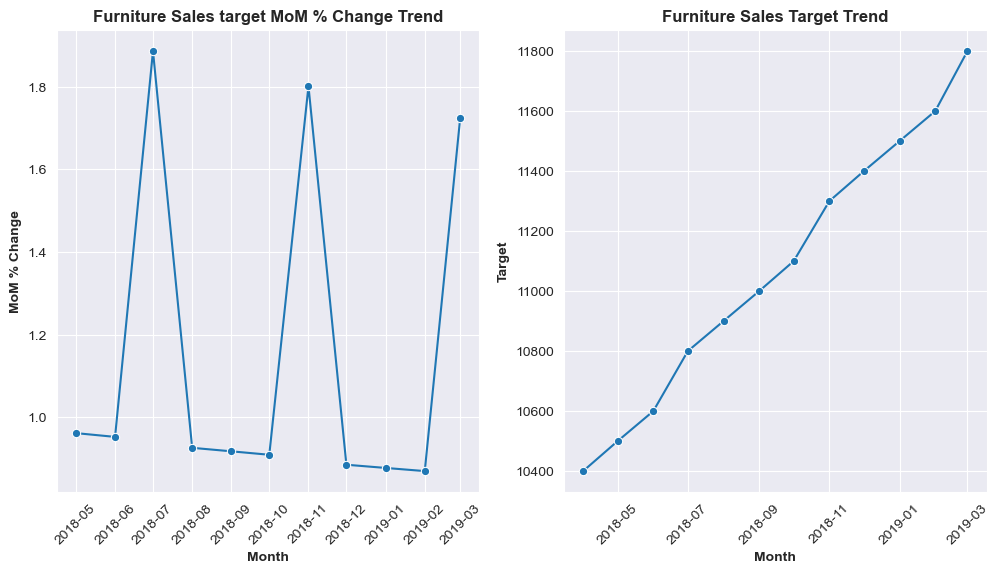

In [170]:
#plot to show fluctuations
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.lineplot(x='Month', y='MoM % Change', data=furniture_target, marker='o')
plt.title('Furniture Sales target MoM % Change Trend',fontweight='bold')
plt.xlabel('Month', fontweight='bold')
plt.ylabel('MoM % Change', fontweight='bold')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.lineplot(x='Month', y='Target', data=furniture_target, marker='o')
plt.title('Furniture Sales Target Trend', fontweight='bold') 
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Target', fontweight='bold')
plt.xticks(rotation=45)


<h1>part-3<h1>

In [173]:
# Top 5 states by order count
merged_regional=pd.merge(orders,order_details,on='Order ID')
order_count=merged_regional.groupby('State')['Order ID'].nunique().reset_index(name='Order_count')
top_states=order_count.nlargest(5,'Order_count')
top_states

,State,Order_count
10,Madhya Pradesh,101
11,Maharashtra,90
14,Rajasthan,32
4,Gujarat,27
13,Punjab,25


In [177]:
# Total Sales and Avg Profit per Order for top states
state_sales=merged_regional.groupby('State')['Amount'].sum().reset_index(name='Total_sales')
state_profit = merged_regional.groupby(['State', 'Order ID'])['Profit'].sum().reset_index().groupby('State')['Profit'].mean().reset_index(name='Avg_profit_per_order')
state_performance = pd.merge(top_states, state_sales, on='State').merge(state_profit, on='State')
state_performance

,State,Order_count,Total_sales,Avg_profit_per_order
0,Madhya Pradesh,101,105140.0,54.960396
1,Maharashtra,90,95348.0,68.622222
2,Rajasthan,32,21149.0,39.281250
3,Gujarat,27,21058.0,17.222222
4,Punjab,25,16786.0,-24.360000


In [141]:
state_profit

,State,Avg_profit_per_order
0,Andhra Pradesh,-33.066667
1,Bihar,-20.062500
2,Delhi,135.772727
3,Goa,26.428571
4,Gujarat,17.222222
5,Haryana,94.642857
6,Himachal Pradesh,46.857143
7,Jammu and Kashmir,0.571429
8,Karnataka,30.714286
9,Kerala,116.937500
